<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Junction-parameters-estimation" data-toc-modified-id="Junction-parameters-estimation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Junction parameters estimation</a></span><ul class="toc-item"><li><span><a href="#Conversion" data-toc-modified-id="Conversion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conversion</a></span></li><li><span><a href="#Chain-mode" data-toc-modified-id="Chain-mode-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Chain mode</a></span></li><li><span><a href="#UMD-fabrication-data" data-toc-modified-id="UMD-fabrication-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>UMD fabrication data</a></span></li><li><span><a href="#Berkeley-fabrication-data" data-toc-modified-id="Berkeley-fabrication-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Berkeley fabrication data</a></span></li><li><span><a href="#Coupling-estimation" data-toc-modified-id="Coupling-estimation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Coupling estimation</a></span></li><li><span><a href="#Phase-slip-estimation" data-toc-modified-id="Phase-slip-estimation-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Phase slip estimation</a></span></li></ul></li></ul></div>

# Junction parameters estimation

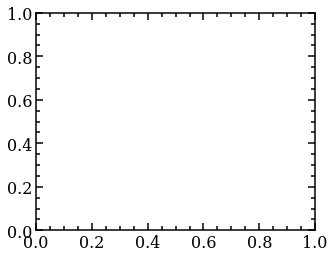

In [1]:
import scipy.constants as cs
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/Notebooks')
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400

## Conversion
Here we use the formulas
$$ E_C = \frac{e^2}{2C_\sum} ,$$

$$ E_L = \frac{\phi_0^2}{L},$$
and with $L_J = \phi_0/ I_c$, we can write
$$E_J = \phi_o I_c,$$
where $\phi_o = \hbar/2e$ is the reduced flux quantum, and $I_c$ is the Josephson junction's critical current. The critical current density can be computed via the relation $J_c \times \mathrm{area} = I_c$. For an array of junctions, the inductive energy and the array junction Josephson energy are linked via the simple relation $E_L \times N = E_{JA}$.\\

To convert from joules to Hz, simple divide by the Planck constant.

In [79]:
phi_o = cs.hbar/(2*cs.e)
def charging_energy(junc_area, C_shunt):
    ''' 
    Junction capacitance: roughly 45fF/um^2  
    Input: junc_area in um^2, C_shunt in F
    Output: charging energy in GHz
    '''
    C_J = 0#45e-15*junc_area #F
    C_sum = C_J+C_shunt
    E_C = cs.e**2/(2*C_sum)/cs.h
    return round(E_C*1e-9,4)

def inductive_energy(inductance):
    '''
    input: inductance in H
    output: inductive energy in GHz
    '''
    L = inductance
    E_L = phi_o**2/L/cs.h
    return round(E_L*1e-9,4)

def junction_energy_current(crit_current):
    '''
    input: critical current in A
    output: inductive energy in GHz
    '''
    Ic = crit_current
    E_L = phi_o*Ic/cs.h
    return round(E_L*1e-9,4)

In [87]:
#Small junction
junc_area = 0.1*0.1 #um^2
C_shunt = 19.35e-15 #F
E_C = charging_energy(junc_area, C_shunt)
print ('Charging energy E_C = ' + str(E_C) +' GHz')
# C_J = 45e-15*junc_area
# print (C_J+C_shunt)

#Inductor
Jc = 500e-9 #A/um^2
big_junc_area = 0.2*4 #um^2
Ic = Jc*big_junc_area
E_JA = junction_energy_current(Ic)
E_L = E_JA/198
print ('Inductive energy E_L = ' + str(E_L) +' GHz')


L = 327e-9
E_L = inductive_energy(L)
print ('Inductive energy E_L = ' + str(E_L) +' GHz')
print ('Each junction inductance is '+ str(L/198*1e9) +' nH')

#By critical current
Jc = 600e-9 #A/um^2
Ic = Jc*junc_area
E_J = junction_energy_current(Ic)
print ('Josephnson energy E_J = ' + str(E_J) +' GHz')

Charging energy E_C = 1.001 GHz
Inductive energy E_L = 1.00340101010101 GHz
Inductive energy E_L = 0.4999 GHz
Each junction inductance is 1.6515151515151514 nH
Josephnson energy E_J = 2.9801 GHz


In [46]:
#Array 
ajunc_area = 1*0.4 #um^2
C_shunt = 0
E_Ca = charging_energy(ajunc_area, C_shunt)
print ('Array E_Ca = ' +str(E_C) +' GHz')

L = 330e-9
num_junc = 100
E_L = inductive_energy(L)
E_Ja = E_L*num_junc
print ('Array E_Ja = ' +str(E_Ja) +' GHz')
print ('E_Ja per um^2 = ' +str(E_Ja/ajunc_area) +' GHz')
print ('Inductive energy E_L = ' +str(E_L) +' GHz')

Array E_Ca = 0.9959 GHz
Array E_Ja = 49.53 GHz
E_Ja per um^2 = 123.825 GHz
Inductive energy E_L = 0.4953 GHz


## Chain mode

Text(0, 0.5, '$\\omega_k/2\\pi$ (GHz)')

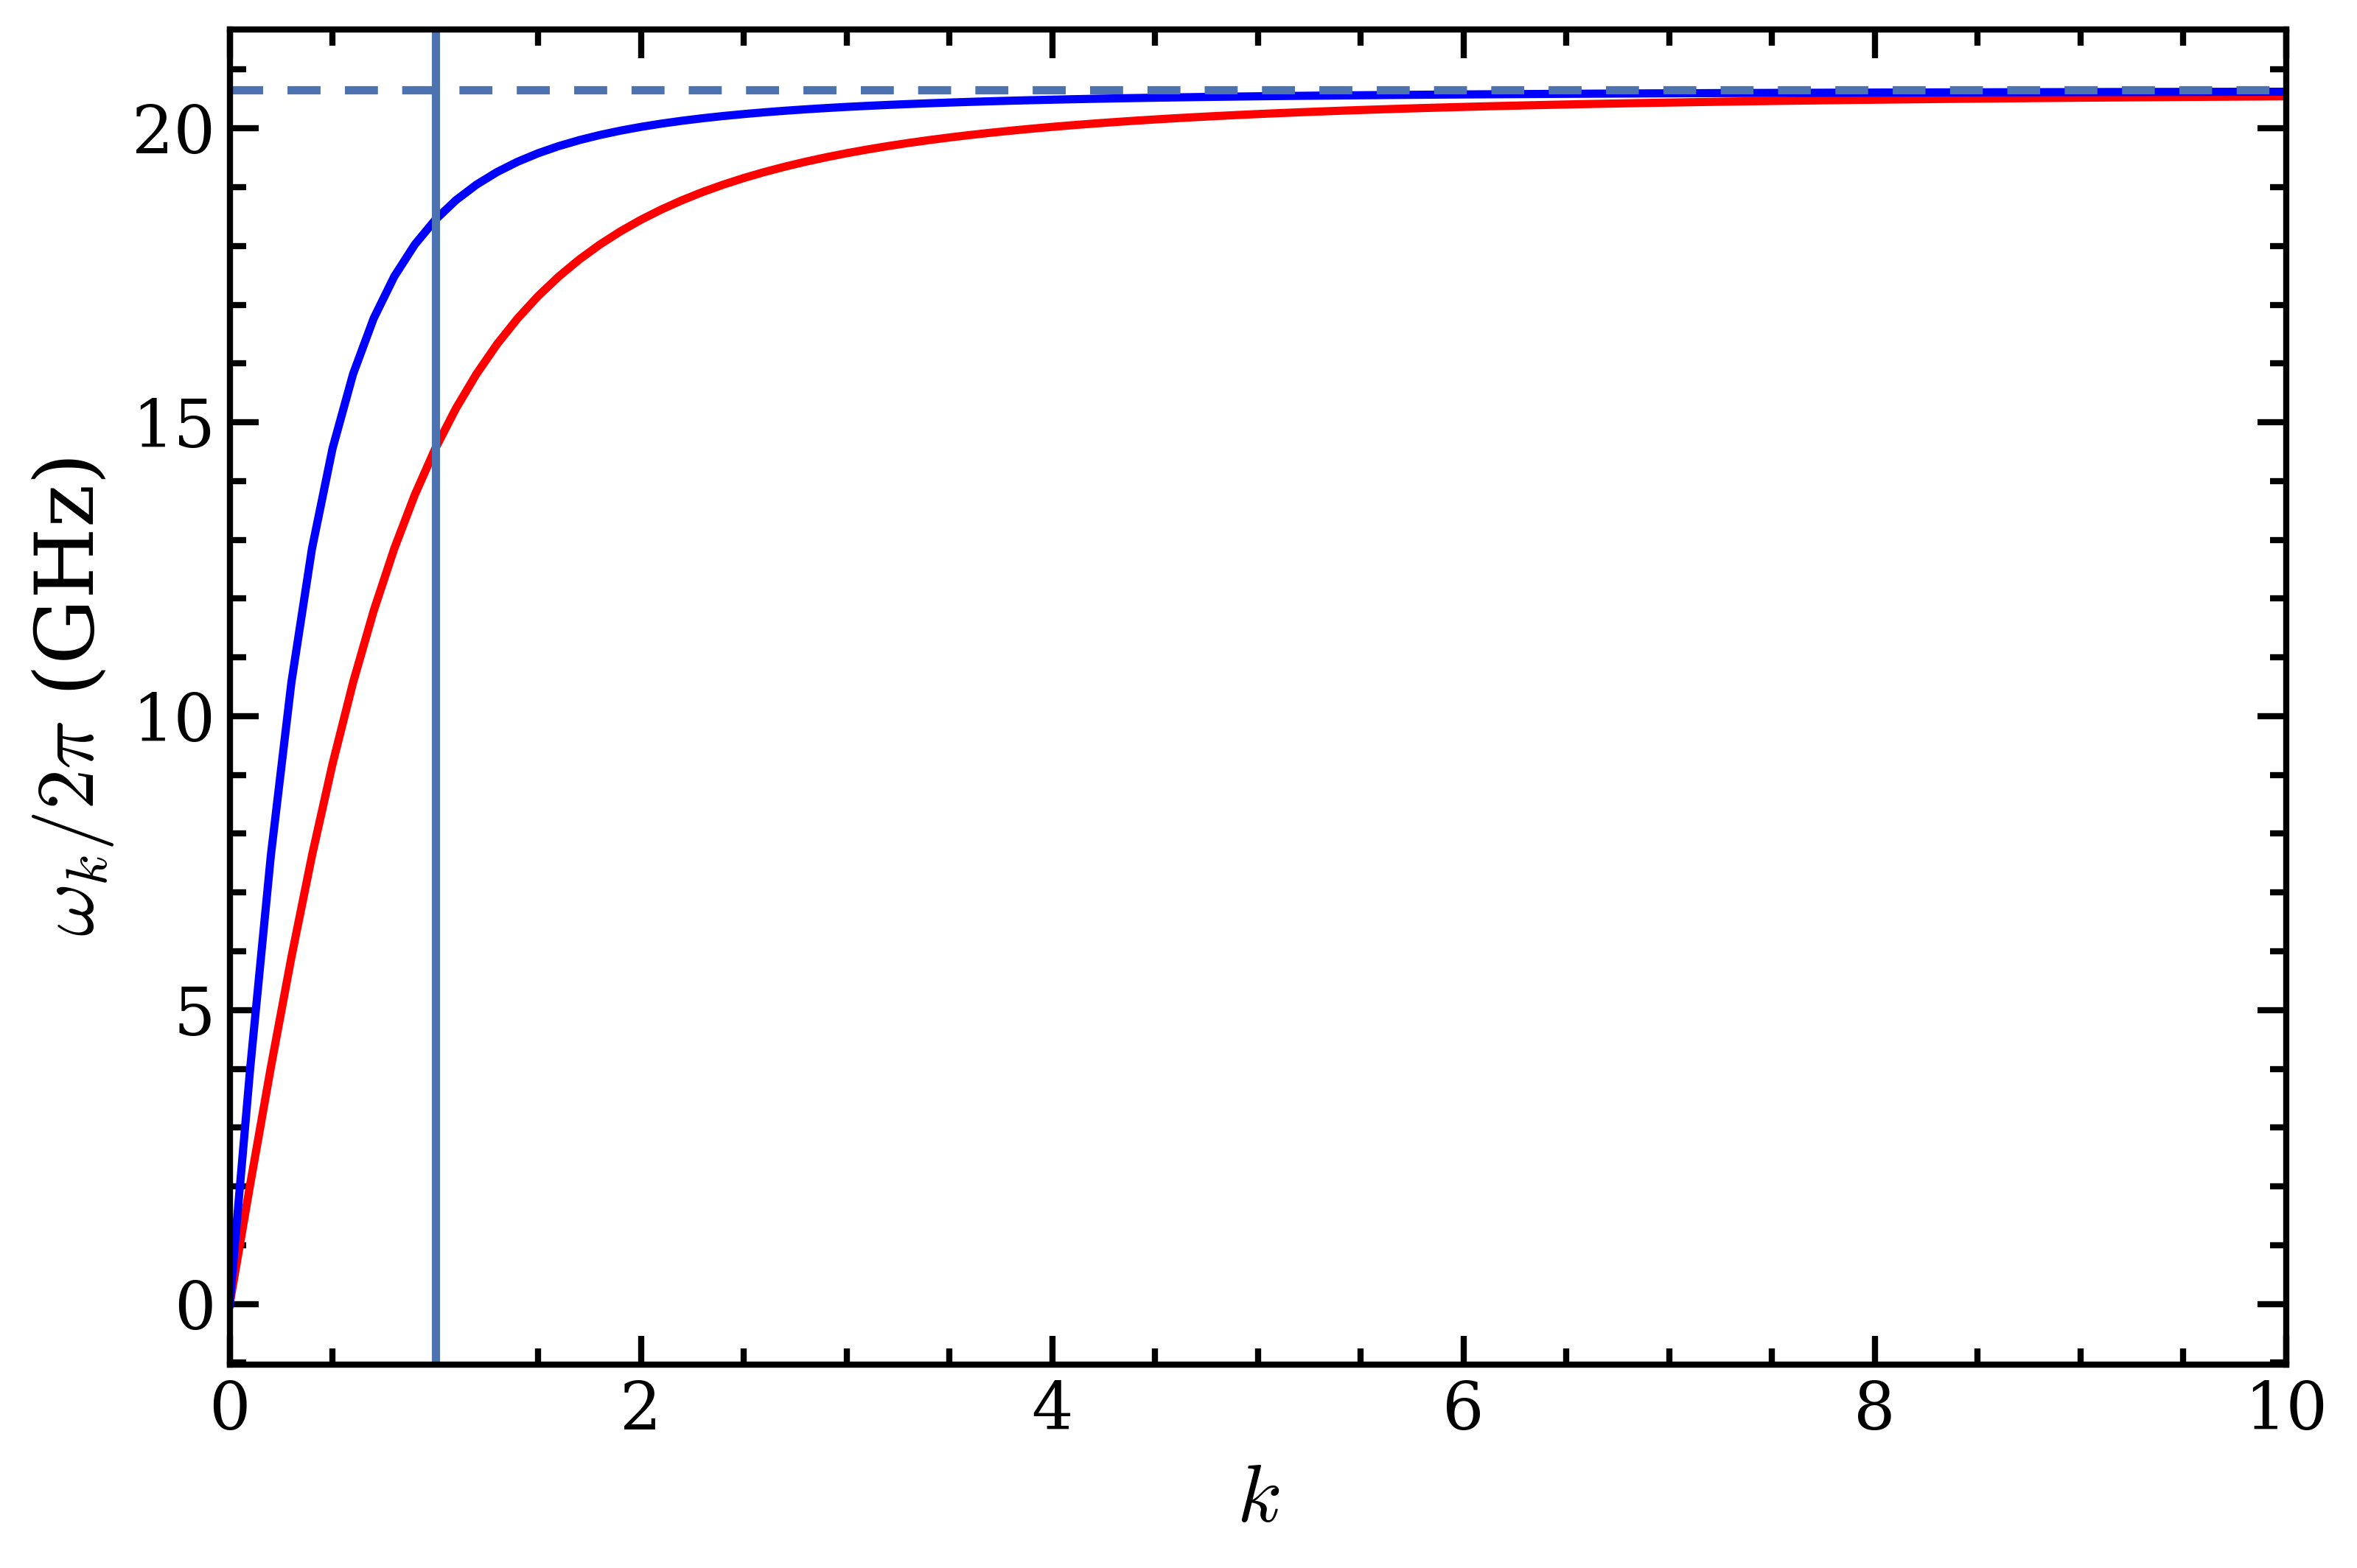

In [16]:
def mode_freq(k,wp,Cg, CJA, N):
    return wp*np.sqrt((1-np.cos(np.pi*k/N))/((1-np.cos(np.pi*k/N))+0.5*Cg/CJA))

plt.figure(figsize = [9,6])
k_array = np.linspace(0,10,101)
w = np.zeros_like(k_array)

#Yale design
# N = 100
# CJA = 40e-15
# LJA = 1.9e-9
# Cg = 0.04e-15
# wp = (LJA*CJA)**(-0.5)
# for idx, k in enumerate(k_array):
#     w[idx] = mode_freq(k,wp,Cg,CJA,N)/(2*np.pi)*1e-9
# plt.plot(k_array,w, label = 'Yale')
# plt.axhline(y=wp/(2*np.pi)*1e-9,linestyle = '--')

#UMD design
N = 100
CJA = 36e-15
LJA = 1.65e-9
Cg = 0.036e-15
wp = (LJA*CJA)**(-0.5)
for idx, k in enumerate(k_array):
    w[idx] = mode_freq(k,wp,Cg,CJA,N)/(2*np.pi)*1e-9
plt.plot(k_array,w, label = 'UMD', color = 'red')
plt.axhline(y=wp/(2*np.pi)*1e-9,linestyle = '--')

N = 50
CJA = 36e-15
LJA = 1.65e-9
Cg = 0.036e-15
wp = (LJA*CJA)**(-0.5)
for idx, k in enumerate(k_array):
    w[idx] = mode_freq(k,wp,Cg,CJA,N)/(2*np.pi)*1e-9
plt.plot(k_array,w, label = 'UMD', color = 'blue')
plt.axhline(y=wp/(2*np.pi)*1e-9,linestyle = '--')

#Berkeley design
# N = 50
# CJA = 20e-15 #H
# LJA = 3e-9 #H
# Cg = 0.04e-15
# wp = (LJA*CJA)**(-0.5)
# for idx, k in enumerate(k_array):
#     w[idx] = mode_freq(k,wp,Cg,CJA,N)/(2*np.pi)*1e-9
# plt.plot(k_array,w, label = 'QNL', color = '#b78727')
# plt.axhline(y=wp/(2*np.pi)*1e-9,linestyle = '--')

#Plotting
plt.axvline(x=1)
plt.xlim([0,10])
plt.xlabel(r'$k$')
plt.ylabel(r'$\omega_k/2\pi$ (GHz)')
# plt.legend()

# plt.figure(figsize = [4,4])
# N_array = np.linspace(1,1000,1000)
# CJA = 36e-15
# LJA = 1.65e-9
# Cg = 0.036e-15
# wp = (LJA*CJA)**(-0.5)
# w = np.zeros(len(N_array))
# for idx, N in enumerate(N_array):
#     k = 1
#     w[idx] = mode_freq(k,wp,Cg,CJA,N)/(2*np.pi)*1e-9
# plt.plot(N_array,w)
# plt.axvline(x=(CJA/Cg)**0.5*np.pi,linestyle = '--', color = 'orange')
# plt.xlabel(r'$N_A$')
# plt.ylabel(r'$\omega_1/2\pi$ (GHz)')
# plt.xlim([0,1000])

In [15]:
np.cos(np.pi/50)-np.cos(np.pi/100)

-0.001479831937460041

## UMD fabrication data

50


(-1.0, 51.0)

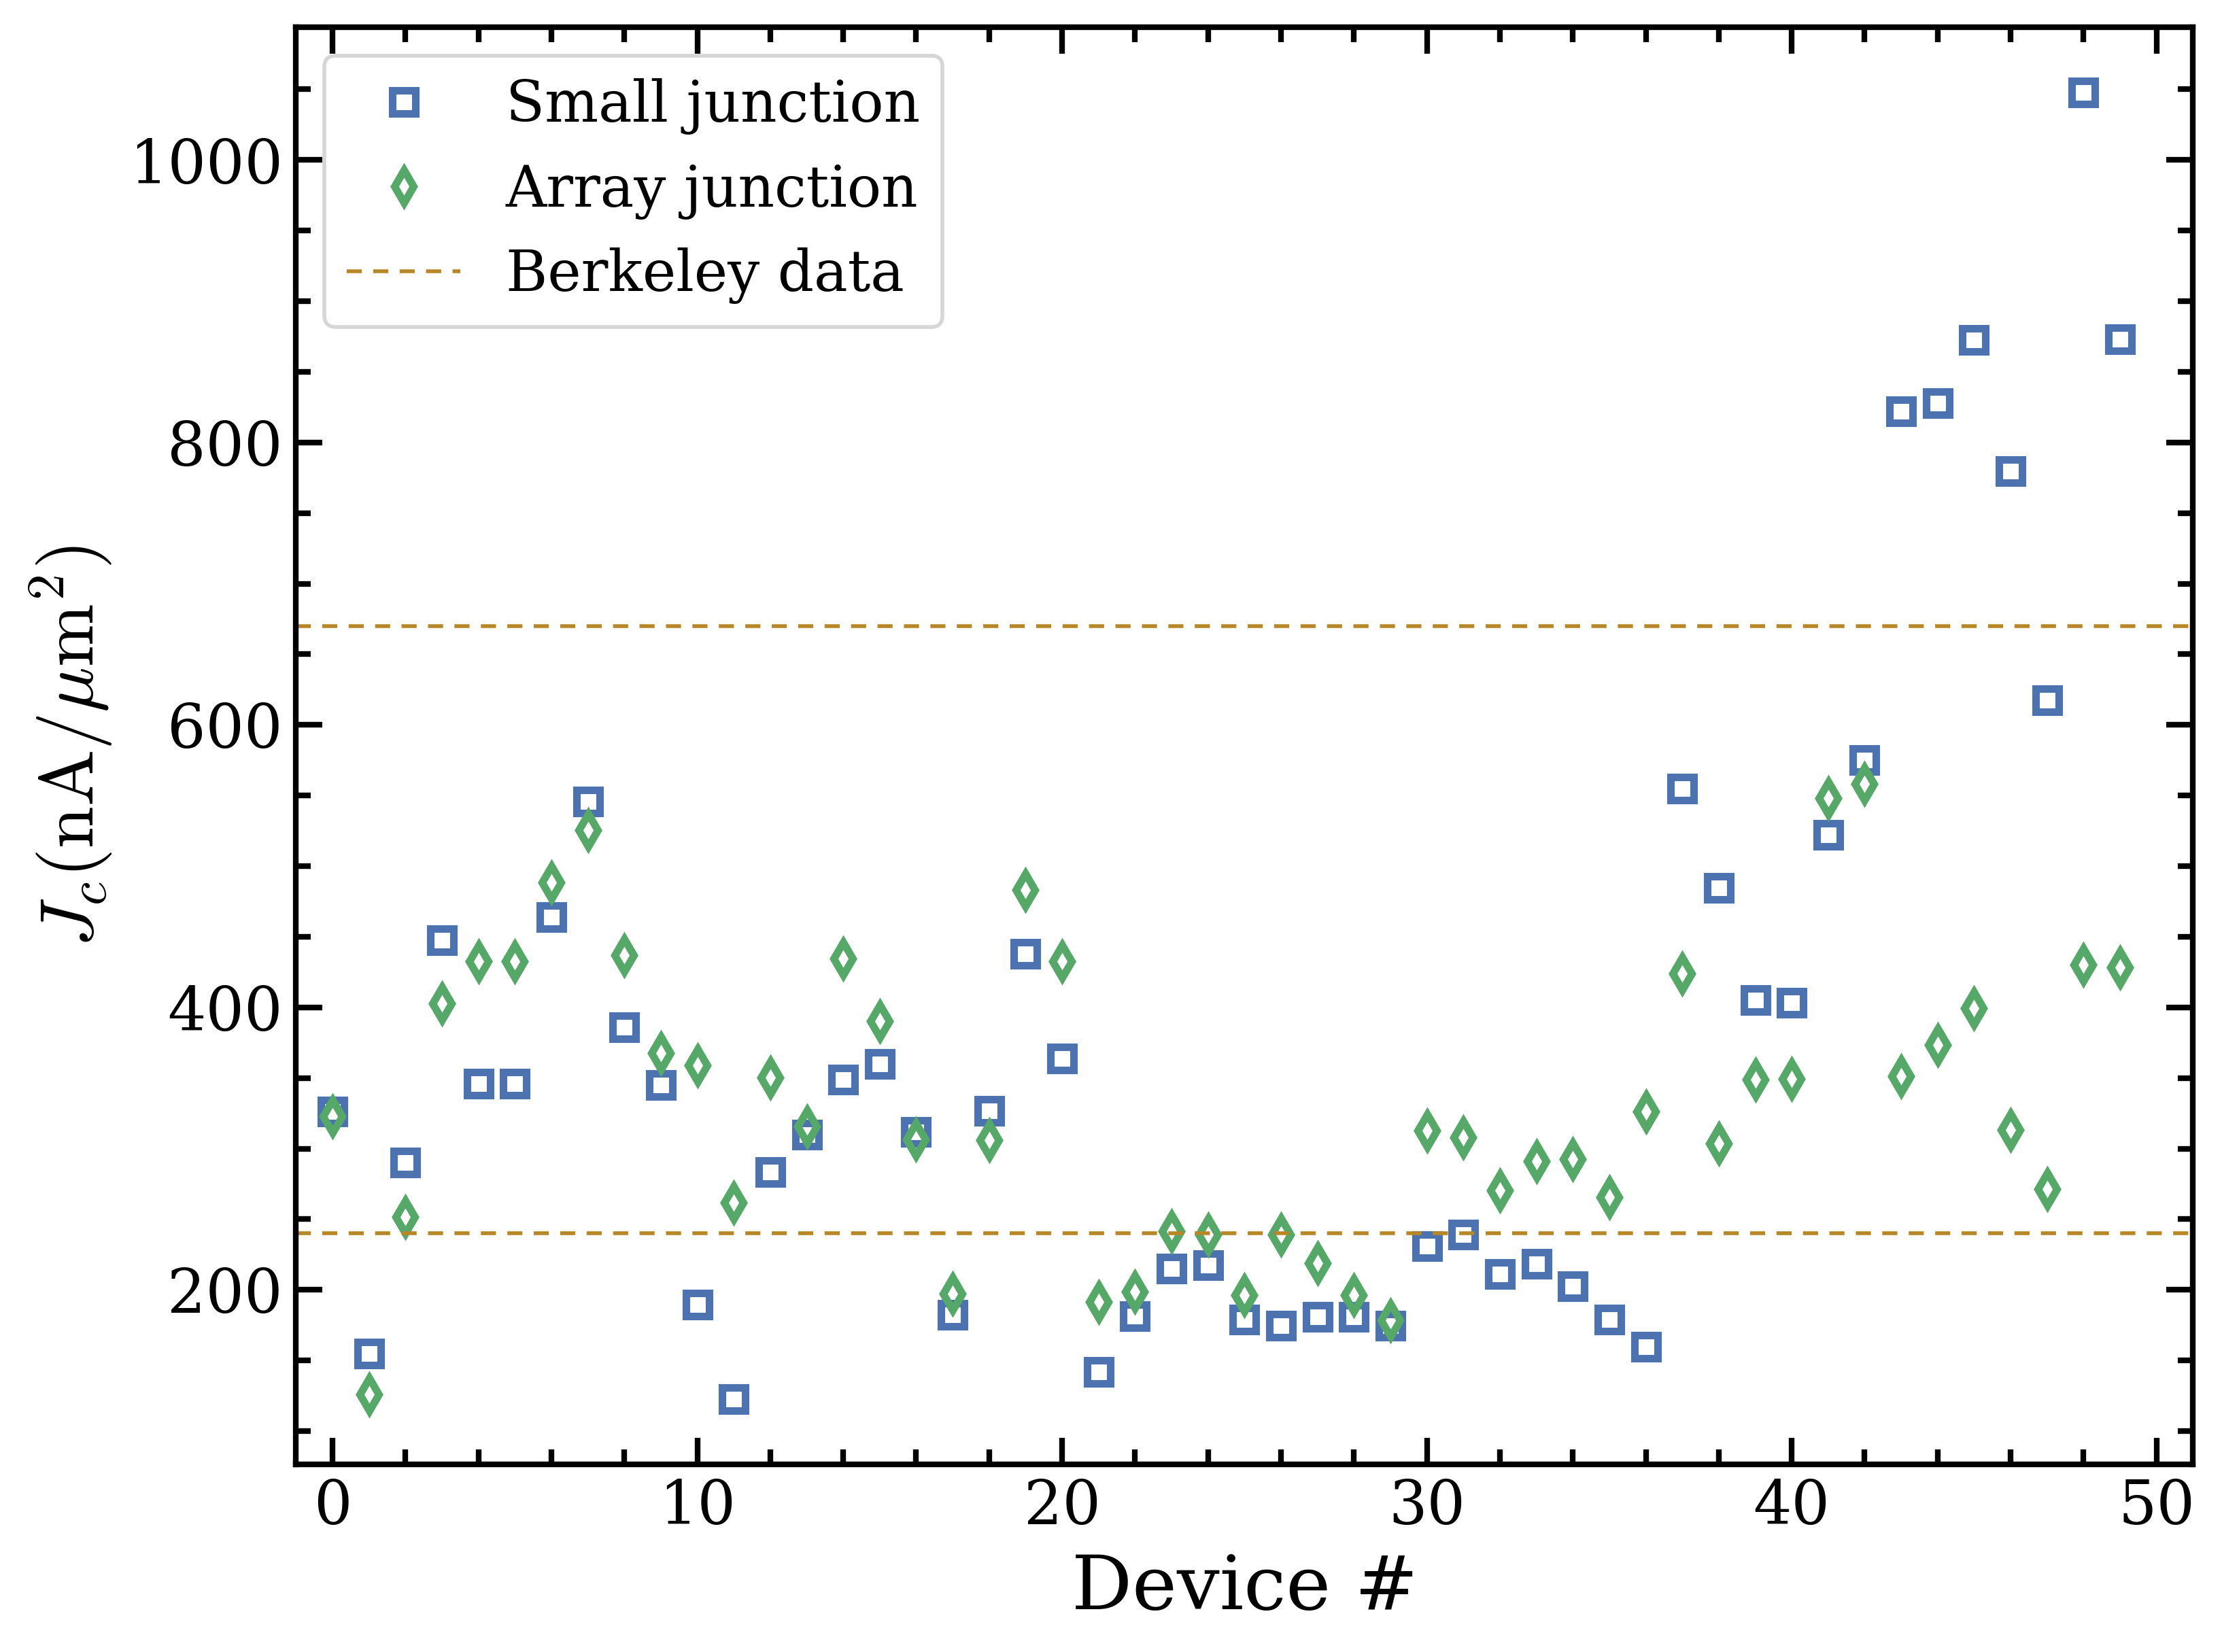

In [6]:
import UMD
samples = UMD.UMD_devices().list_of_devices

print (len(samples))
E_J_all = np.zeros(len(samples))
E_L_all = np.zeros_like(E_J_all)
E_C_all = np.zeros_like(E_J_all)
juncArea_all = np.zeros_like(E_J_all)
juncNum_all = np.zeros_like(E_J_all)
ajuncArea_all = np.zeros_like(E_J_all)
for idx in range(len(samples)):
    E_J_all[idx] = samples[idx]['E_J']
    E_L_all[idx] = samples[idx]['E_L']
    E_C_all[idx] = samples[idx]['E_C']
    juncArea_all[idx] = samples[idx]['junc_area']*1e-6
    juncNum_all[idx] = samples[idx]['array_junc_num']
    ajuncArea_all[idx] = samples[idx]['array_junc_area']
    
E_J_chain = E_L_all * juncNum_all

#Critical current density
J_o_junc = (E_J_all*1e9*cs.h) / phi_o / juncArea_all
J_o_chain = (E_J_chain*1e9*cs.h) / phi_o / ajuncArea_all
plt.figure(figsize = [9,7])
plt.plot(J_o_junc*1e9, linestyle = 'none', marker='s',markerfacecolor = 'none', markeredgewidth=2, label='Small junction')
plt.plot(J_o_chain*1e9, linestyle = 'none', marker='d',markerfacecolor = 'none', markeredgewidth=2, label='Array junction')

#Plot Berkeley Jc line
plt.axhline(240, linewidth = 1, linestyle ='--', color = '#b78727', label='Berkeley data')
plt.axhline(670, linewidth = 1, linestyle ='--', color = '#b78727')

plt.xlabel('Device #')
plt.ylabel('$J_c(\mathrm{nA/\mu m^2})$')
plt.legend()
plt.xlim([-1,51])



## Berkeley fabrication data
Current array junction has area $0.2~\mathrm{\mu m}\times 3.96 ~\mathrm{\mu m}$, same as UMD's, but thinner. 45 degree evaporation should bring the area to $0.2~\mathrm{\mu m}\times 3.2 ~\mathrm{\mu m}$. The current spacing between junctions is $500~\mathrm{nm}$, but we can make it $250~\mathrm{nm}$ to have a tightly-packed array. Currently $J_c=670~\mathrm{nA/\mu m^2}$, but normally should be $670~\mathrm{nA/\mu m^2}$

## Coupling estimation
Here we estimate the coupling coefficients $J_L$ and $J_C$, with 
$$
J_C = 4e^2 \frac{C_m}{C_AC_B}
$$
where $C_A\sim C_B\sim 20~\mathrm{fF}$ and
$$
J_L =\left(\frac{\hbar}{2e}\right)^2 \frac{L_m}{L_AL_B}
$$
where $L_A\sim L_B\sim 200~\mathrm{nH}$


In [35]:
def cap_coupl_coeff(C_m,C_A,C_B):
    ''' 
    Input: Capacitances in F
    Output: Coupling constant in MHz
    '''
    coeff = 4*cs.e**2*C_m/(C_A*C_B)
    return coeff/cs.h*1e-6

def ind_coupl_coeff(L_m, L_A, L_B):
    ''' 
    Input: Inductance in H
    Output: Coupling constant in MHz
    '''
    coeff = (cs.hbar/2/cs.e)**2*L_m/(L_A*L_B)
    return coeff/cs.h*1e-6

(11.0, 12.0)

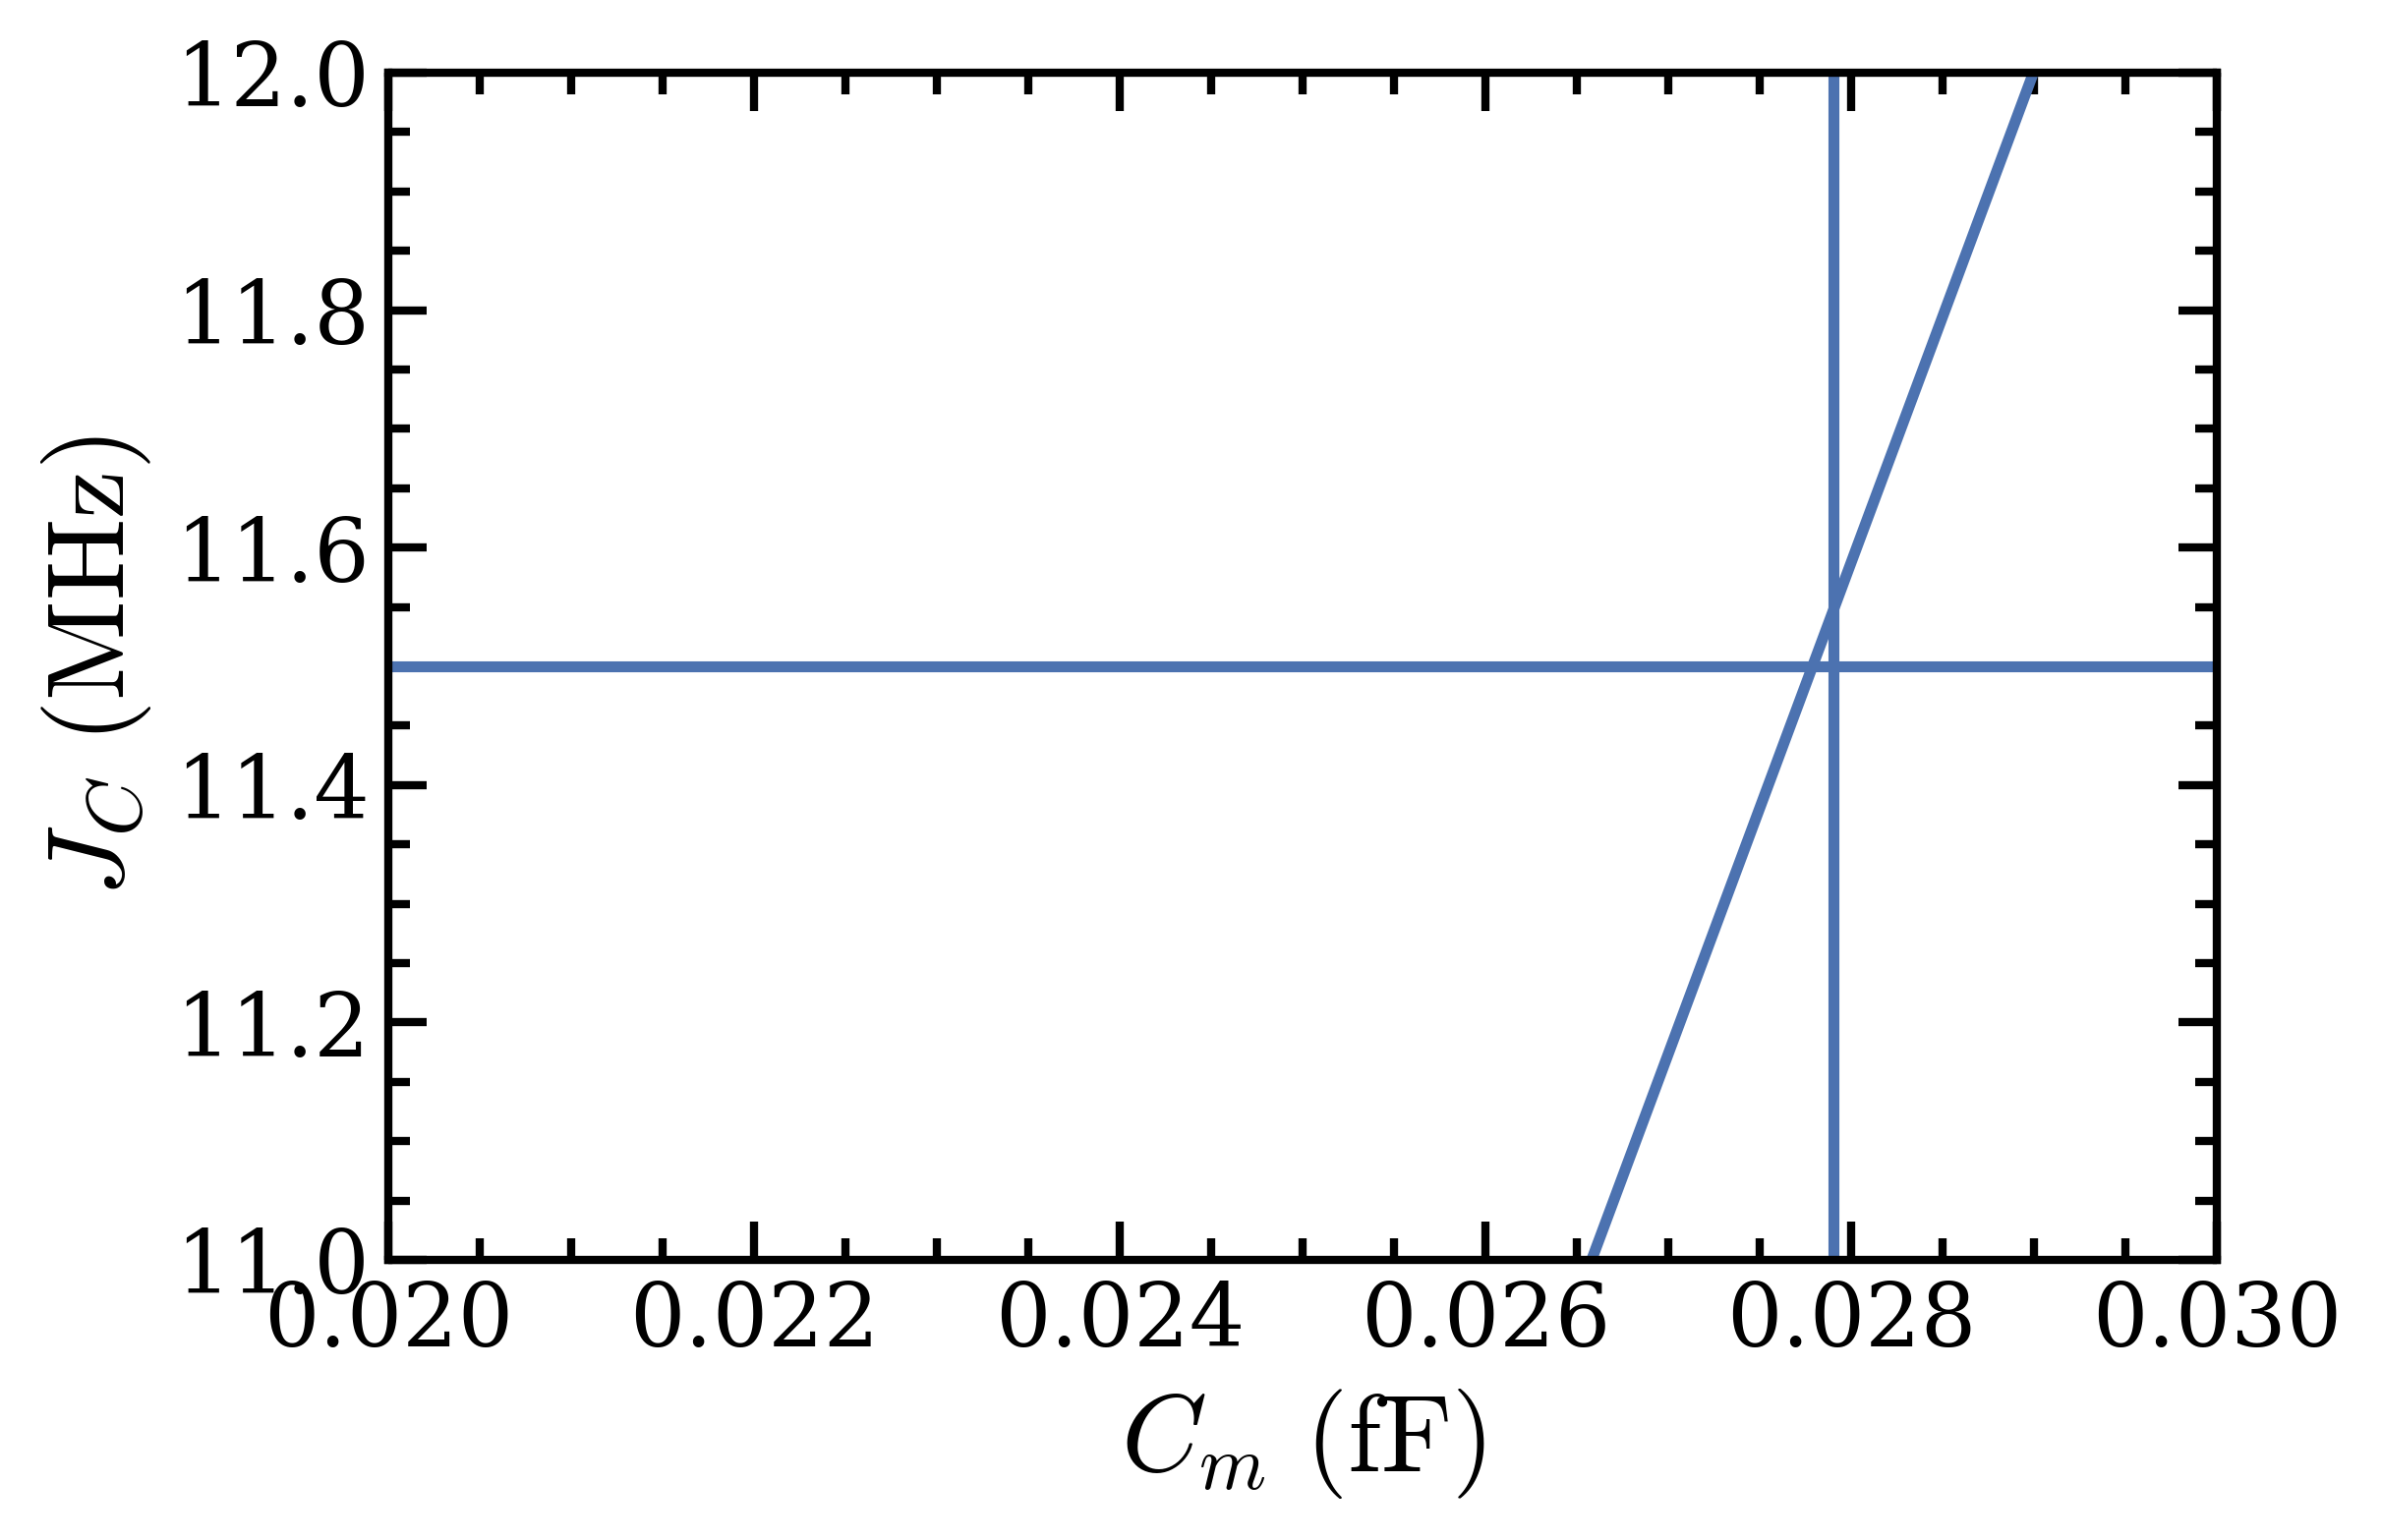

In [89]:
C_m = np.linspace(0,0.1,1001)*1e-15 #in farad
C_A = 19.35e-15
C_B = 19.35e-15
plt.plot(C_m*1e15, cap_coupl_coeff(C_m,C_A,C_B))
plt.xlabel(r'$C_m~(\mathrm{fF})$')
plt.ylabel(r'$J_C~(\mathrm{MHz})$')
plt.axhline(11.5)
plt.axvline(0.0279)
plt.xlim([0.02,0.03])
plt.ylim([11,12])

(350.0, 370.0)

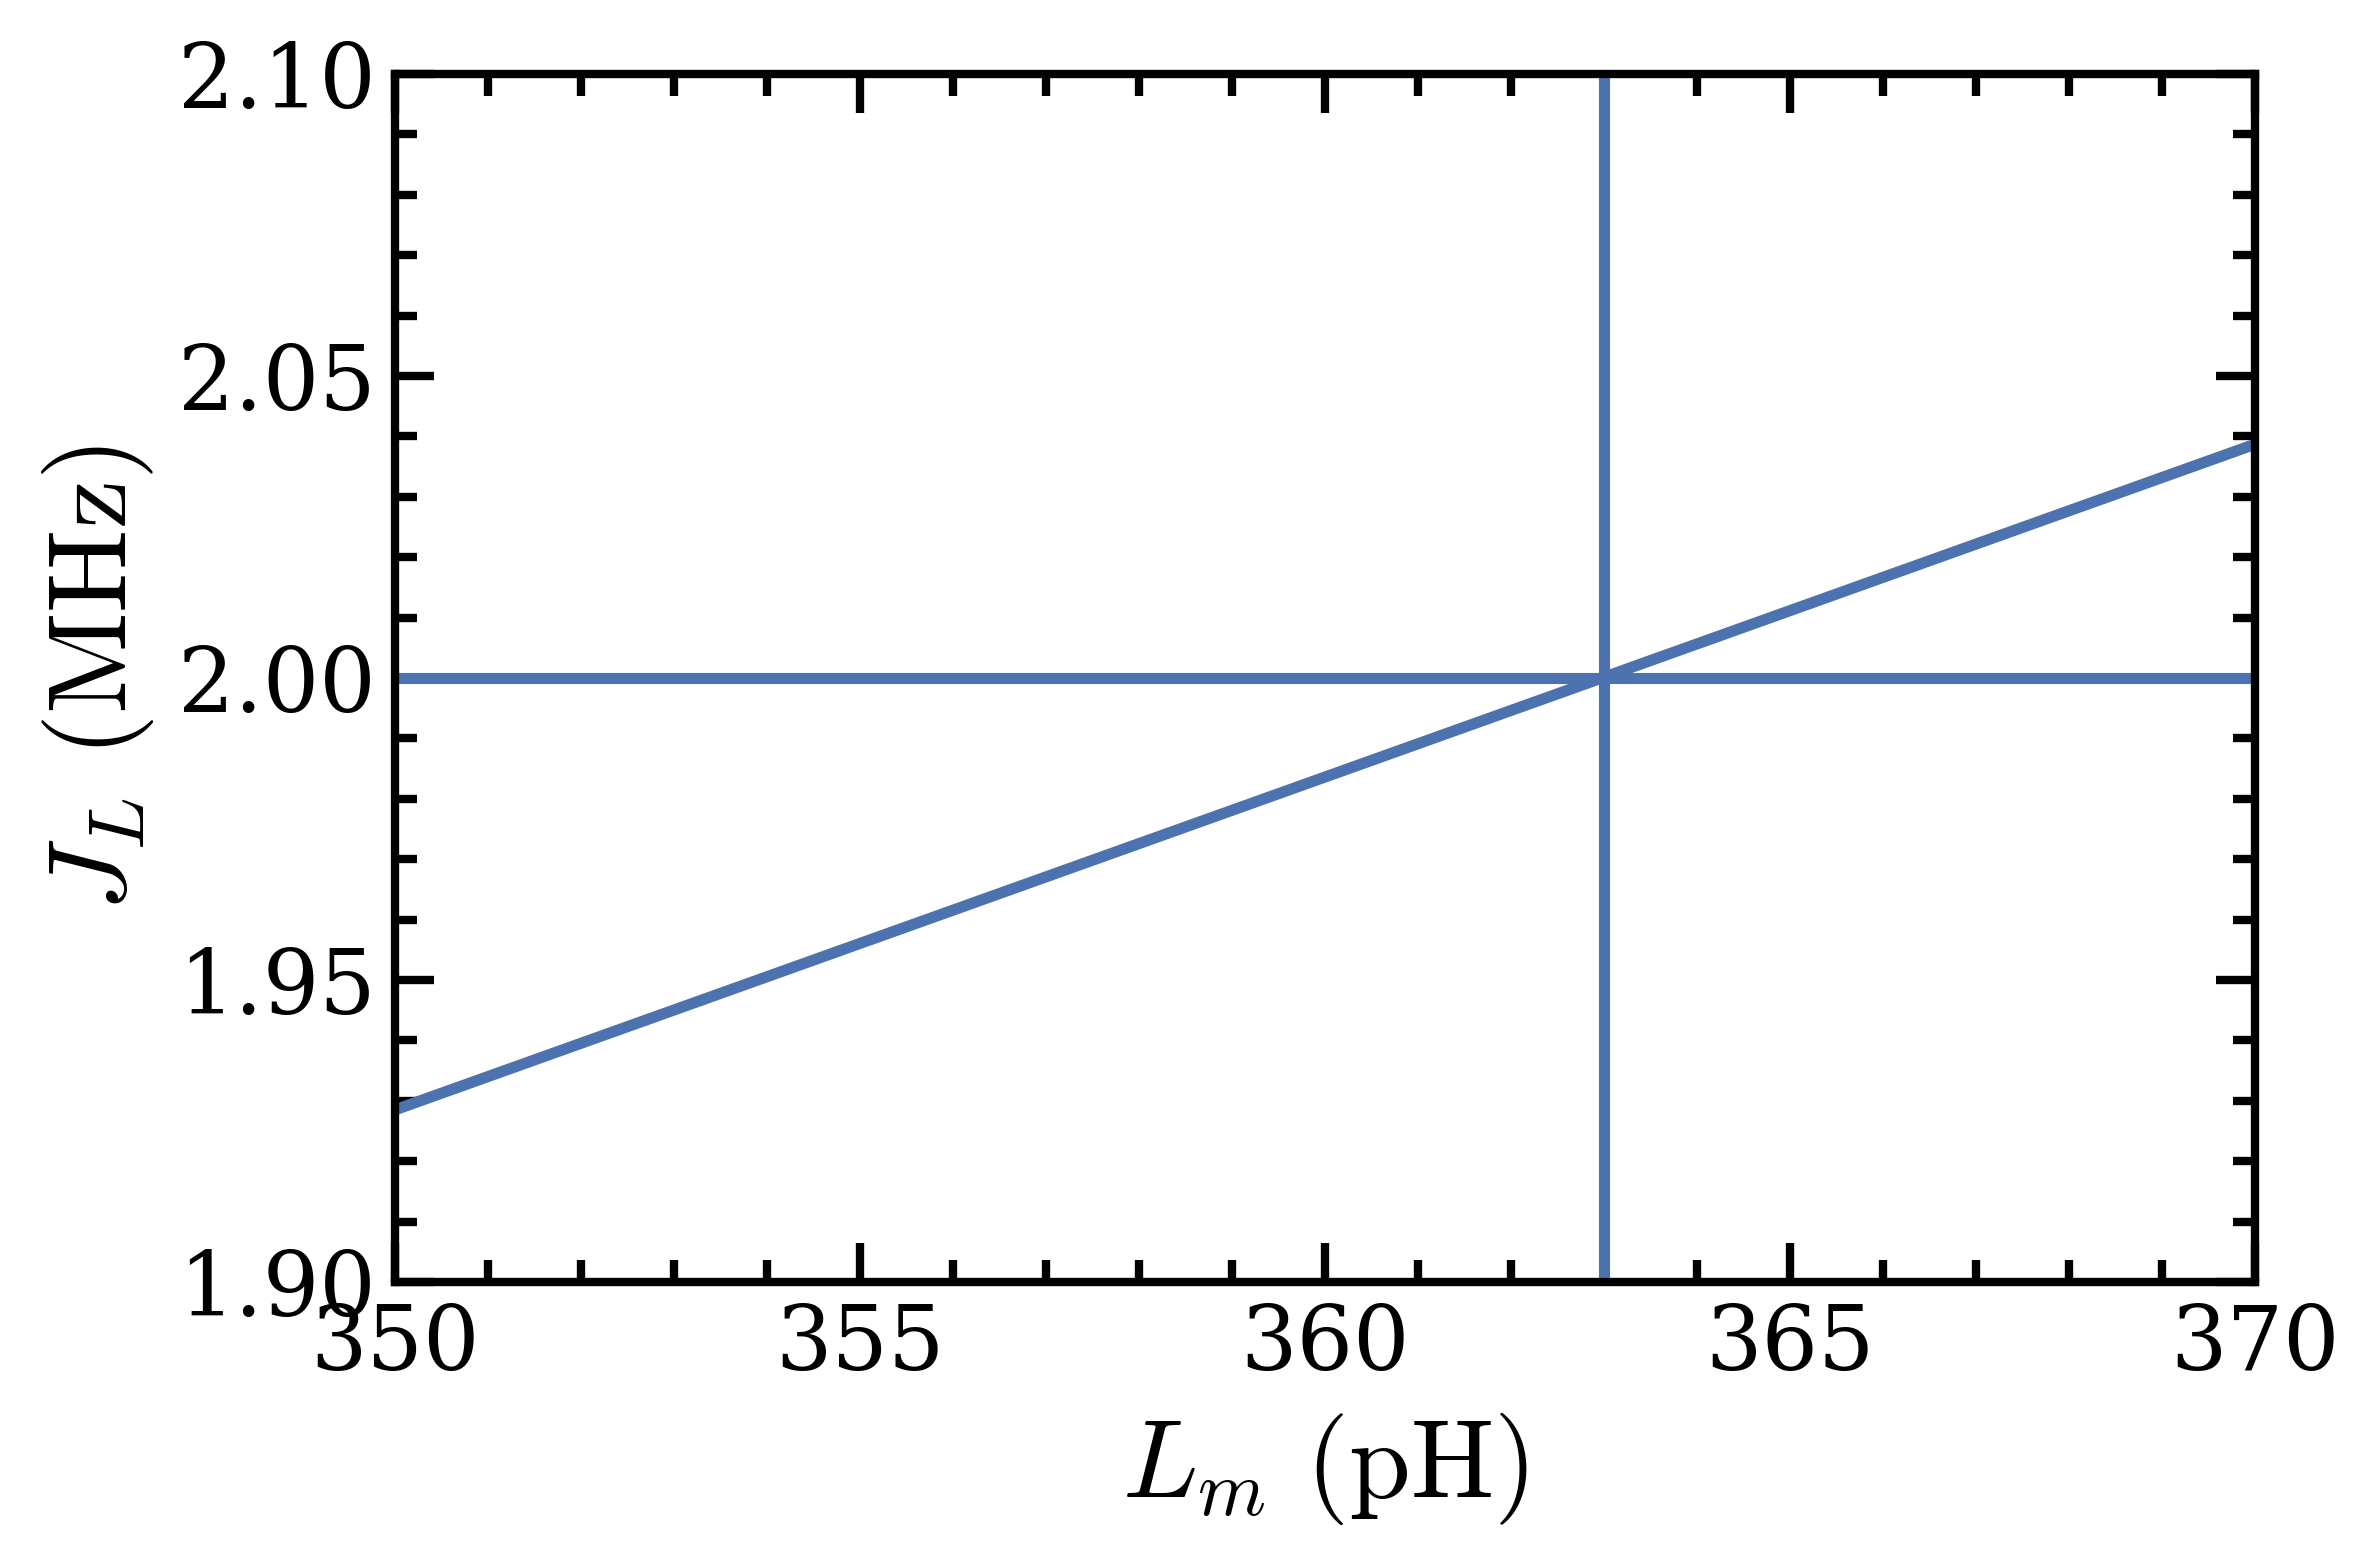

In [47]:
L_m = np.linspace(200,400,101)*1e-12
L_A = 163e-9
L_B = 182e-9
plt.plot(L_m*1e12, ind_coupl_coeff(L_m,L_A,L_B))
plt.axhline(2)
plt.axvline(363)
plt.xlabel(r'$L_m~(\mathrm{pH})$')
plt.ylabel(r'$J_L~(\mathrm{MHz})$')
plt.ylim(1.9,2.1)
plt.xlim(350,370)

In [54]:
def y_to_delta(l_a, l_b, l_c):
    common_num = l_a*l_b + l_a*l_c + l_c*l_b
    l_ab = common_num/l_c
    l_bc = common_num/l_a
    l_ac = common_num/l_b
    print ('L_AB =', str(l_ab))
    print ('L_BC =', str(l_bc))
    print ('L_AC =', str(l_ac))
    return

y_to_delta(300, 0.3, 300)

L_AB = 300.6
L_BC = 300.6
L_AC = 300600.0


## Phase slip estimation